<a href="https://colab.research.google.com/github/Stellin-25/cloud-main1/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem Understanding**
# we need to predict the vechile insurence **claim** is fradulent or not based on the data which given the data contains detailed about
1. Demographics Data  
2.  Policy Information  
3. Data of Claim
4. Data of  Vehicle


Claim related fraud is a huge problem in the insurance industry.It is complex and difficult to identify those unwanted claims. With Random Forest Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.


In [136]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [137]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [139]:
!ls /content/drive/MyDrive/


 23RH1A05QX.pdf
 5-08-25.zip
 8095202309032600754688.pdf
'app (1).js'
'app (2).js'
'app (3).js'
'app (4).js'
 App.css
 app.js
 app.py
 calculator.html
'cisco cybersecurity essentials (1).pdf'
'cisco cybersecurity essentials.pdf'
'cisco intro to cs.pdf'
 cisco.jpg
 Classroom
'Colab Notebooks'
 COLLAB.py
'Copy of Train_Claim.csv'
'CyberSecurity PS.pdf'
 exp1.py
'Exploring network packet tracer.pdf'
 IMG_5438.jpeg
 index.html
 mrecw.html
 MRECW_V.Stellin_STU67d8e4b8cd66f1742267576
 ms-1.pdf
 ms-2.pdf
 ms-3.pdf
 oracle-1.pdf
 oracle-2.pdf
 oracle-3.pdf
'PacketTracer (1).pdf'
 PacketTracer.pdf
'page2 (3).html'
 PS
'Saved from the Google app'
 Screenshot_2023-09-14-17-45-33-249_com.phonepe.app.jpg
 Screenshot_2023-09-14-17-51-14-571_com.phonepe.app.jpg
'signature 23RH1A05QX.pdf'
'STELLIN MARY 23RH1A05QX.pdf'
 SuperMarketSales.csv.zip
 Train_Claim.csv
 Traindata_withoutTarget.xlsx
 Traindata_with_Target.csv
 Train_Demographics.csv
 Train_Policy.csv
 Train_Vehicle.csv
 Train_Vehicle_new.csv


In [140]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import pandas as pd

# Correct file paths (files are directly in /MyDrive)
df1 = pd.read_csv('/content/drive/MyDrive/Train_Claim.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Train_Demographics.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Train_Policy.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Train_Vehicle_new.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Traindata_with_Target.csv')

# Optional: check loaded data
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)


(28836, 19)
(28836, 10)
(28836, 10)
(28836, 5)
(28836, 2)


In [142]:
#merging all datasets based on "CstomerID"
sample_1=pd.merge(df1,df2)
sample_2=pd.merge(sample_1,df3)
sample_3=pd.merge(sample_2,df4)
master=pd.merge(sample_3,df5)

In [143]:
master.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [144]:
# Making a list of missing value types
missing_values = ["MISSEDDATA","NA","?","MISSINGVALUE","???",-5,"MISSINGVAL",-1,"N/A","na"]

In [145]:
#we create one missing values list by using that if that comes in any place we replace it with nan
# Replace all "missing" values with np.nan in the dataframe
for column in master.columns:
    for missing in missing_values:
        master[column] = np.where(master[column] == missing, np.nan, master[column])


In [146]:
master.isnull().sum()

,0
CustomerID,0
DateOfIncident,0
TypeOfIncident,0
TypeOfCollission,5162
SeverityOfIncident,0
AuthoritiesContacted,2692
IncidentState,0
IncidentCity,0
IncidentAddress,0
IncidentTime,31


In [147]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        26144 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  float64
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  float64
 13  Witnesses                   287

In [148]:
#checking missing values percent using isnull function
master.isnull().sum()/len(master)*100

,0
CustomerID,0.000000
DateOfIncident,0.000000
TypeOfIncident,0.000000
TypeOfCollission,17.901235
SeverityOfIncident,0.000000
AuthoritiesContacted,9.335553
IncidentState,0.000000
IncidentCity,0.000000
IncidentAddress,0.000000
IncidentTime,0.107505


# Imputing Missing Values for both **numeric** and **catagorical**

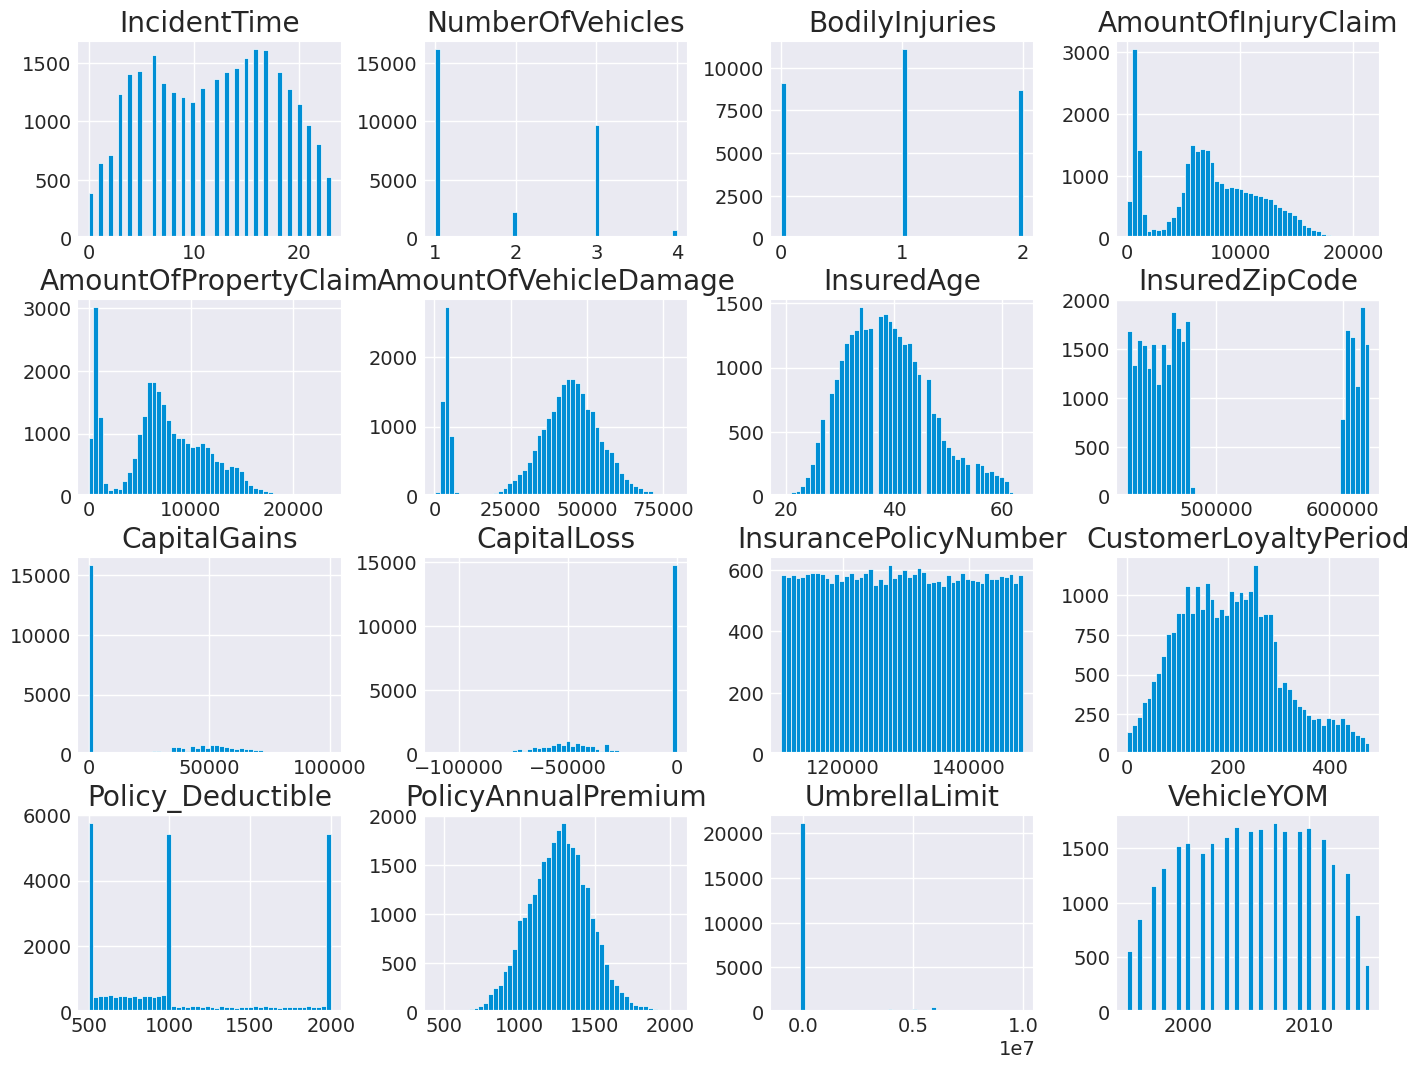

In [149]:
#by using hist graph we can see how data distributed
master.hist(bins=50,figsize=(15, 12))
plt.show()

In [150]:
##  Replace NAN values with most occured category in TypeOfCollission
Mode_Category = master["TypeOfCollission"].mode()[0]
master["TypeOfCollission"].fillna(Mode_Category,inplace=True)

/tmp/ipython-input-3534502637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master["TypeOfCollission"].fillna(Mode_Category,inplace=True)


In [151]:
##  Replace NAN values with median in IncidentTime
median=master['IncidentTime'].median()
master['IncidentTime'].fillna(median,inplace=True)

/tmp/ipython-input-3563577241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master['IncidentTime'].fillna(median,inplace=True)


In [152]:
#drop country missing value data
master.drop(['Country'],axis=1,inplace=True)

In [153]:
##  Replace NAN values with median  in witness
# quick diagnostics
print(master['Witnesses'].dtype)
print(master['Witnesses'].head(20))
print(master['Witnesses'].unique()[:50])   # show up to 50 unique values
print(master['Witnesses'].apply(type).unique())  # see if there are lists/objects


object
0     0
1     1
2     3
3     3
4     1
5     2
6     2
7     2
8     0
9     2
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    2
18    1
19    1
Name: Witnesses, dtype: object
['0' '1' '3' '2' nan]
[<class 'str'> <class 'float'>]


In [154]:
##  Replace NAN values with most occured category in police report
#Mode_Category_1 = master["PoliceReport"].mode()[0]
#master["PoliceReport"].fillna(Mode_Category_1,inplace=True)

In [155]:
master['PoliceReport'].fillna('missing',inplace=True)

/tmp/ipython-input-4239893784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master['PoliceReport'].fillna('missing',inplace=True)


In [156]:
master['PoliceReport']

,PoliceReport
0,missing
1,YES
2,NO
3,NO
4,YES
...,...
28831,missing
28832,YES
28833,YES
28834,YES


In [157]:
###  Replace NAN values with median in AmountOfTotalClaim
import pandas as pd
import numpy as np

# 1️⃣  Convert the column safely to numeric
master['AmountOfTotalClaim'] = pd.to_numeric(master['AmountOfTotalClaim'], errors='coerce')

# 2️⃣  Compute the median (now works, because the column is numeric)
median_2 = master['AmountOfTotalClaim'].median()

# 3️⃣  Replace NaN values with the median
master['AmountOfTotalClaim'].fillna(median_2, inplace=True)

# 4️⃣  Optional: Check result
print(master['AmountOfTotalClaim'].head())
print("Median used:", median_2)


0    65501.0
1    61382.0
2    66755.0
3    66243.0
4    53544.0
Name: AmountOfTotalClaim, dtype: float64
Median used: 58360.0


/tmp/ipython-input-2533471695.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master['AmountOfTotalClaim'].fillna(median_2, inplace=True)


In [158]:
##  Replace NAN values with most occured category in gender
Mode_Category_2 = master["InsuredGender"].mode()[0]
master["InsuredGender"].fillna(Mode_Category_2,inplace=True)

/tmp/ipython-input-523490193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master["InsuredGender"].fillna(Mode_Category_2,inplace=True)


In [159]:
master.drop(['CustomerID','VehicleID','InsurancePolicyNumber'],axis=1,inplace=True)

In [160]:
###  Replace NAN values with median in PolicyAnnualPremium
median_3=master['PolicyAnnualPremium'].median()
master['PolicyAnnualPremium'].fillna(median_3,inplace=True)

/tmp/ipython-input-3664092314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master['PolicyAnnualPremium'].fillna(median_3,inplace=True)


In [161]:
##  Replace NAN values with most occured category in VehicleMake
Mode_Category_3 = master["VehicleMake"].mode()[0]
master["VehicleMake"].fillna(Mode_Category_3,inplace=True)

/tmp/ipython-input-3557759812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master["VehicleMake"].fillna(Mode_Category_3,inplace=True)


In [162]:
master.isnull().sum().any()

np.True_

In [163]:
master['PropertyDamage'].fillna('missing',inplace=True)

/tmp/ipython-input-819001610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master['PropertyDamage'].fillna('missing',inplace=True)


In [164]:
master['PropertyDamage']

,PropertyDamage
0,missing
1,YES
2,YES
3,YES
4,NO
...,...
28831,NO
28832,YES
28833,YES
28834,missing


In [165]:
#master['PD']=[1 if i=='missing' else 0 for i in master.PropertyDamage ]
#master=master.drop(columns=['PropertyDamage'])

In [166]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateOfIncident              28836 non-null  object 
 1   TypeOfIncident              28836 non-null  object 
 2   TypeOfCollission            28836 non-null  object 
 3   SeverityOfIncident          28836 non-null  object 
 4   AuthoritiesContacted        26144 non-null  object 
 5   IncidentState               28836 non-null  object 
 6   IncidentCity                28836 non-null  object 
 7   IncidentAddress             28836 non-null  object 
 8   IncidentTime                28836 non-null  float64
 9   NumberOfVehicles            28836 non-null  float64
 10  PropertyDamage              28836 non-null  object 
 11  BodilyInjuries              28836 non-null  float64
 12  Witnesses                   28790 non-null  object 
 13  PoliceReport                288

In [167]:
#two numerical feature shows object type change type to numerical
# ensure numeric first
master['AmountOfTotalClaim'] = pd.to_numeric(master['AmountOfTotalClaim'], errors='coerce')
# compute median (float), choose an integer replacement (round or int)
median_amt = int(master['AmountOfTotalClaim'].median())  # or round(...)
# fill NaNs then convert to int
master['AmountOfTotalClaim'] = master['AmountOfTotalClaim'].fillna(median_amt).astype(int)

# same for Witnesses
master['Witnesses'] = pd.to_numeric(master['Witnesses'], errors='coerce')
median_w = int(master['Witnesses'].median())
master['Witnesses'] = master['Witnesses'].fillna(median_w).astype(int)


In [168]:
master['ReportedFraud'].value_counts()

,count
ReportedFraud,
N,21051
Y,7785


# Visuvalization

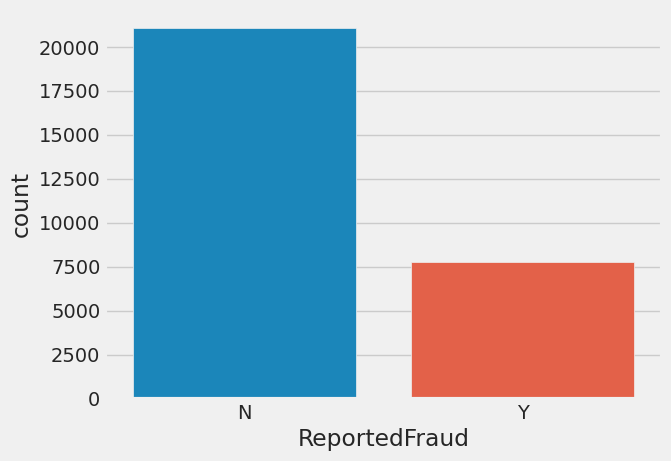

In [169]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='ReportedFraud', data=master, hue='ReportedFraud')

In [170]:
#function for crosstabs
def cross_tab(x,y):
    crtab = pd.crosstab(master[x], master[y])
    return crtab

In [171]:
#insuredgender vs ReportedFraud
cross_tab('InsuredGender','ReportedFraud')

ReportedFraud,N,Y
InsuredGender,,
FEMALE,11607,4067
MALE,9444,3718


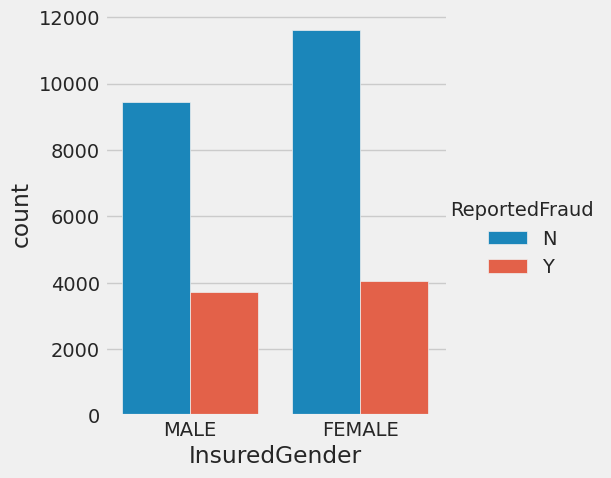

In [172]:
sns.catplot(data=master,x='InsuredGender',hue='ReportedFraud',kind='count')

In [173]:
#insuredgender vs ReportedFraud
cross_tab('PoliceReport','ReportedFraud')

ReportedFraud,N,Y
PoliceReport,,
NO,7230,2668
YES,6721,2412
missing,7100,2705


([0, 1, 2, 3],
 [Text(0, 0, 'Total Loss'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Major Damage'),
  Text(3, 0, 'Trivial Damage')])

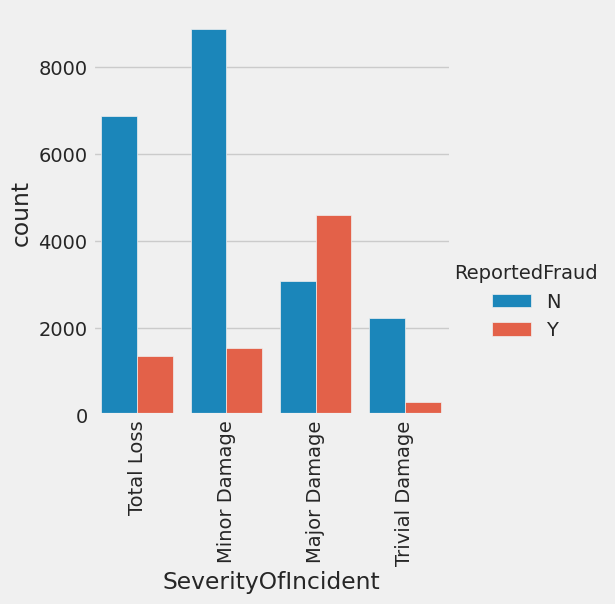

In [174]:
#sevarity of incident vs Reportedfraud
sns.catplot(data=master,x='SeverityOfIncident',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

In [175]:
#PropertyDamage vs ReportedFraud
cross_tab('PropertyDamage','ReportedFraud')

ReportedFraud,N,Y
PropertyDamage,,
NO,7464,2223
YES,6335,2355
missing,7252,3207


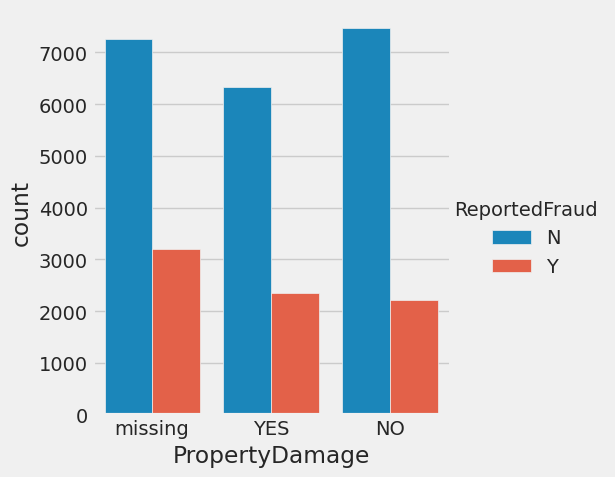

In [176]:
sns.catplot(data=master,x='PropertyDamage',hue='ReportedFraud',kind='count')

In [177]:
#InsurancePolicyState v/s ReportedFraud
cross_tab('InsurancePolicyState','ReportedFraud')

ReportedFraud,N,Y
InsurancePolicyState,,
State1,7320,2396
State2,6470,2504
State3,7261,2885


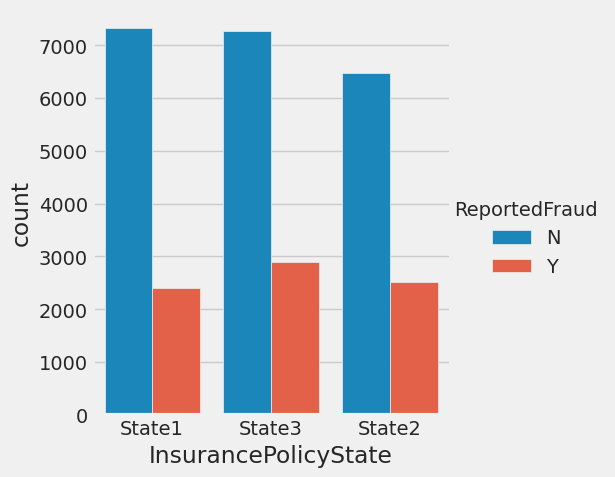

In [178]:
#insurence policy state vs reported fraud
sns.catplot(data=master,x='InsurancePolicyState',hue='ReportedFraud',kind='count')

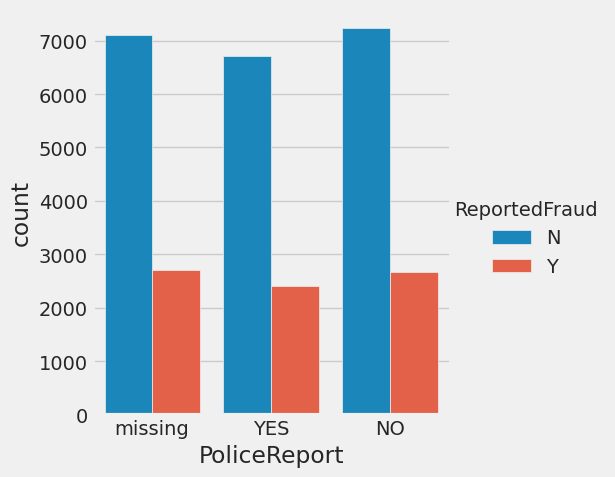

In [179]:
sns.catplot(data=master,x='PoliceReport',hue='ReportedFraud',kind='count')

([0, 1, 2],
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

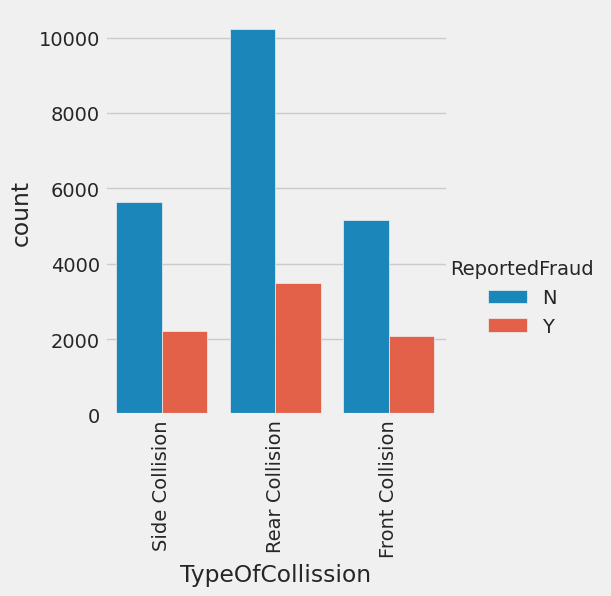

In [180]:
sns.catplot(data=master,x='TypeOfCollission',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

([0, 1, 2, 3],
 [Text(0, 0, 'Multi-vehicle Collision'),
  Text(1, 0, 'Single Vehicle Collision'),
  Text(2, 0, 'Parked Car'),
  Text(3, 0, 'Vehicle Theft')])

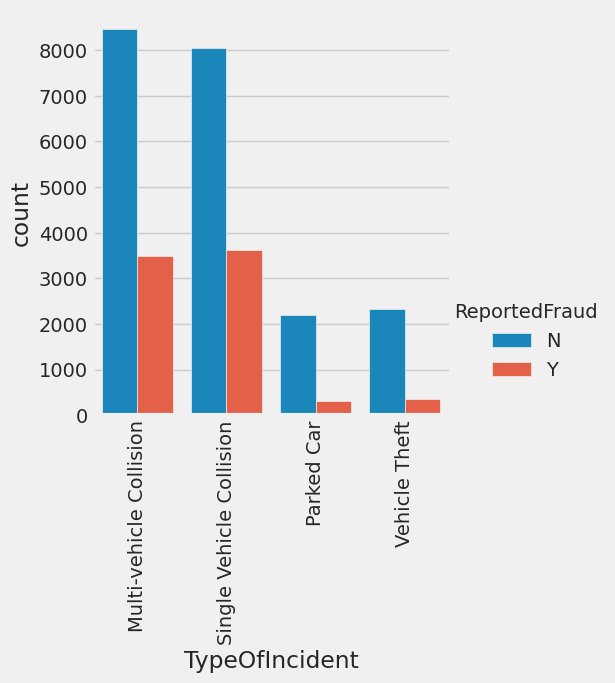

In [181]:
#incidenttype vs ReportedFraud
sns.catplot(data=master,x='TypeOfIncident',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)


In [182]:
#insured education level v/s ReportedFraud
cross_tab('InsuredEducationLevel','ReportedFraud')

ReportedFraud,N,Y
InsuredEducationLevel,,
Associate,3071,1054
College,2439,1023
High School,3391,1192
JD,3572,1236
MD,3007,1154
Masters,3087,1054
PhD,2484,1072


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'JD'),
  Text(1, 0, 'High School'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'MD'),
  Text(4, 0, 'Associate'),
  Text(5, 0, 'College'),
  Text(6, 0, 'PhD')])

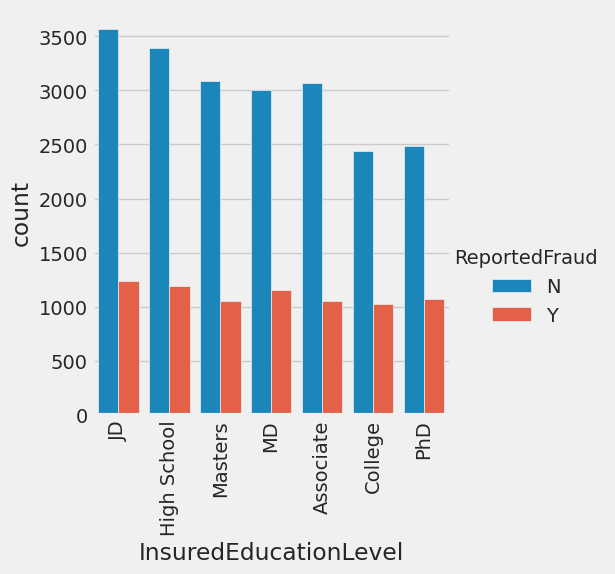

In [183]:
sns.catplot(data=master,x='InsuredEducationLevel',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)


In [184]:
#insured relationship v/s ReportedFraud
cross_tab('InsuredRelationship','ReportedFraud')

ReportedFraud,N,Y
InsuredRelationship,,
husband,3840,1162
not-in-family,3808,1414
other-relative,3523,1630
own-child,4047,1195
unmarried,2754,1239
wife,3079,1145


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'not-in-family'),
  Text(1, 0, 'wife'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'husband'),
  Text(5, 0, 'other-relative')])

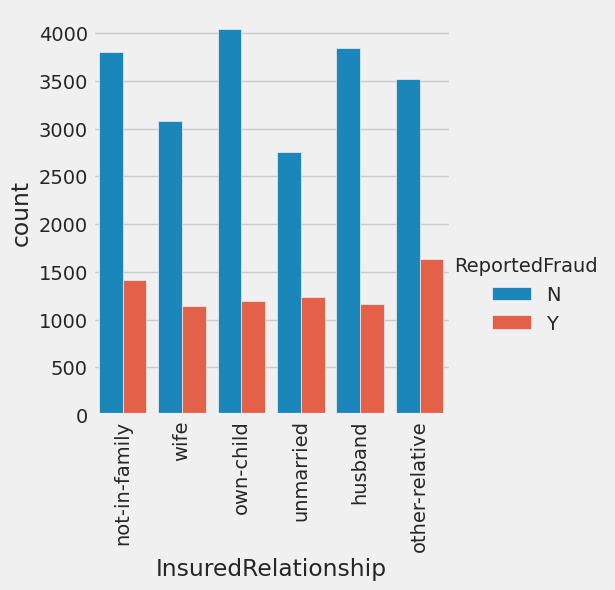

In [185]:
sns.catplot(data=master,x='InsuredRelationship',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

In [186]:
#authorities contacted v/s fraud reported

cross_tab('AuthoritiesContacted','ReportedFraud')

ReportedFraud,N,Y
AuthoritiesContacted,,
Ambulance,3971,1761
Fire,4602,1916
Other,3764,1806
Police,6288,2036


([0, 1, 2, 3],
 [Text(0, 0, 'Police'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Ambulance')])

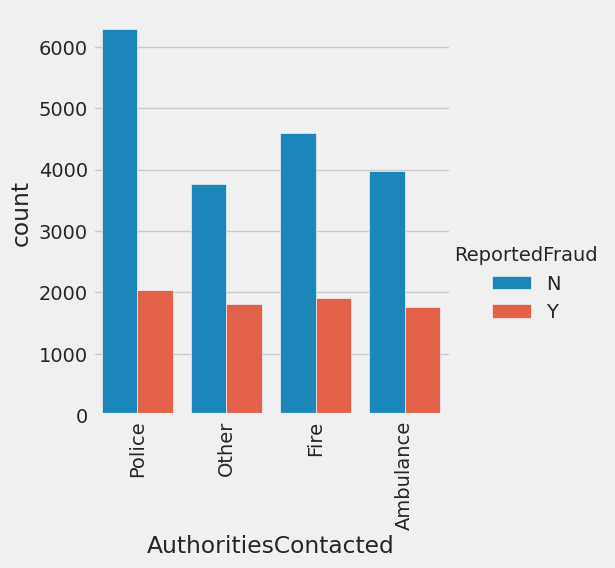

In [187]:
#Authoritiescontacted vs reported fraud
sns.catplot(data=master,x='AuthoritiesContacted',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'City1'),
  Text(1, 0, 'City5'),
  Text(2, 0, 'City6'),
  Text(3, 0, 'City4'),
  Text(4, 0, 'City3'),
  Text(5, 0, 'City2'),
  Text(6, 0, 'City7')])

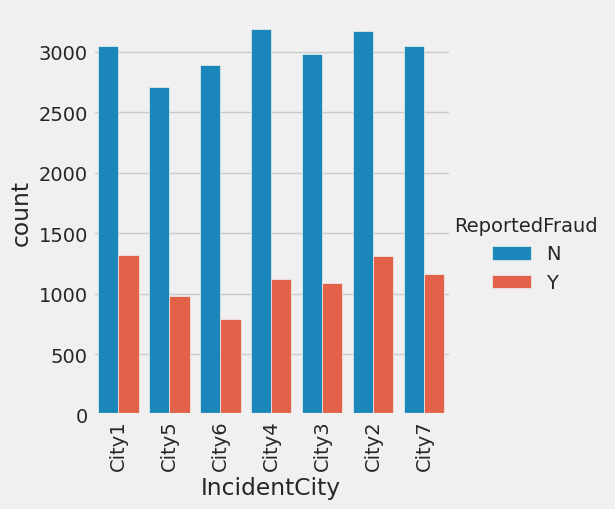

In [188]:
#incident city vs Reported fraud
sns.catplot(data=master,x='IncidentCity',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '1995.0'),
  Text(1, 0, '1996.0'),
  Text(2, 0, '1997.0'),
  Text(3, 0, '1998.0'),
  Text(4, 0, '1999.0'),
  Text(5, 0, '2000.0'),
  Text(6, 0, '2001.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2005.0'),
  Text(11, 0, '2006.0'),
  Text(12, 0, '2007.0'),
  Text(13, 0, '2008.0'),
  Text(14, 0, '2009.0'),
  Text(15, 0, '2010.0'),
  Text(16, 0, '2011.0'),
  Text(17, 0, '2012.0'),
  Text(18, 0, '2013.0'),
  Text(19, 0, '2014.0'),
  Text(20, 0, '2015.0')])

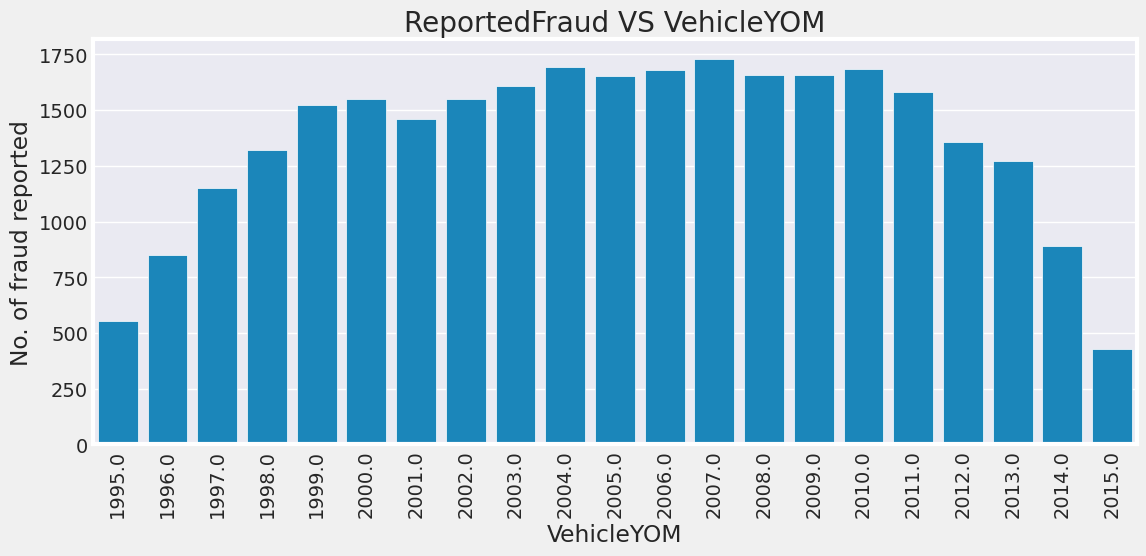

In [189]:
plt.figure(figsize = (12, 5))
df_temp = master[master.ReportedFraud == 'Y']
sns.set_style('darkgrid')
sns.countplot(x = 'VehicleYOM', data = master)
plt.ylabel('No. of fraud reported')
plt.title('ReportedFraud VS VehicleYOM')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'armed-forces'),
  Text(1, 0, 'tech-support'),
  Text(2, 0, 'exec-managerial'),
  Text(3, 0, 'adm-clerical'),
  Text(4, 0, 'handlers-cleaners'),
  Text(5, 0, 'craft-repair'),
  Text(6, 0, 'prof-specialty'),
  Text(7, 0, 'other-service'),
  Text(8, 0, 'priv-house-serv'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'farming-fishing'),
  Text(11, 0, 'sales'),
  Text(12, 0, 'transport-moving'),
  Text(13, 0, 'machine-op-inspct')])

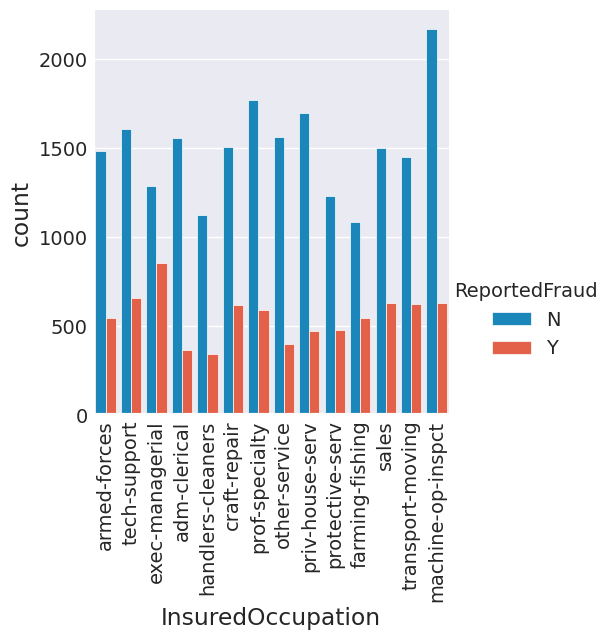

In [190]:
sns.catplot(data=master,x='InsuredOccupation',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'armed-forces'),
  Text(1, 0, 'tech-support'),
  Text(2, 0, 'exec-managerial'),
  Text(3, 0, 'adm-clerical'),
  Text(4, 0, 'handlers-cleaners'),
  Text(5, 0, 'craft-repair'),
  Text(6, 0, 'prof-specialty'),
  Text(7, 0, 'other-service'),
  Text(8, 0, 'priv-house-serv'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'farming-fishing'),
  Text(11, 0, 'sales'),
  Text(12, 0, 'transport-moving'),
  Text(13, 0, 'machine-op-inspct')])

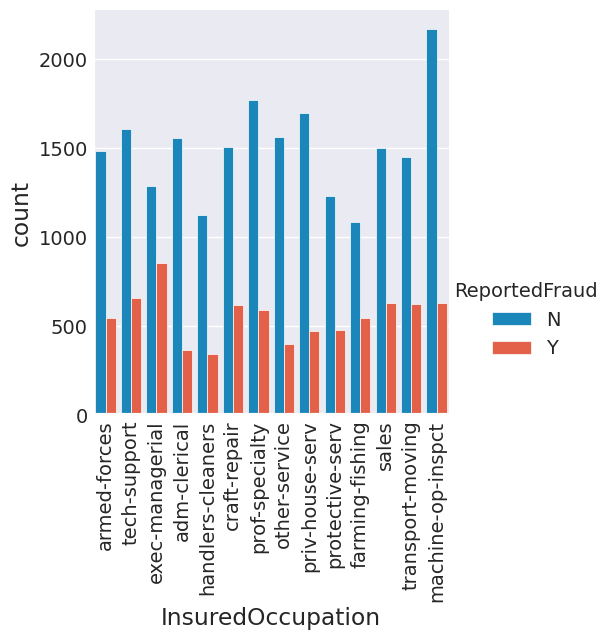

In [191]:
sns.catplot(data=master,x='InsuredOccupation',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

([0, 1, 2], [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')])

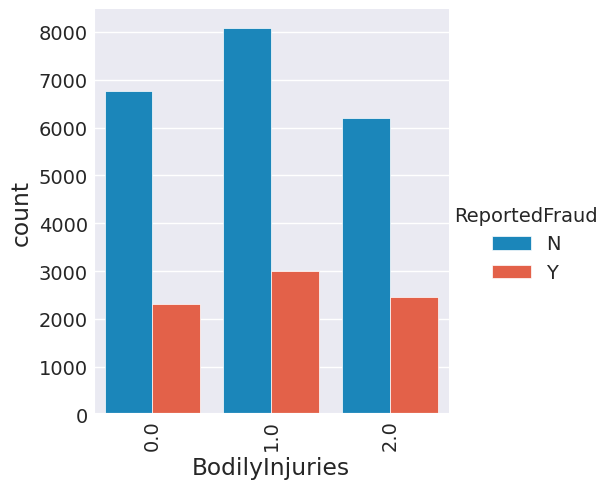

In [192]:
sns.catplot(data=master,x='BodilyInjuries',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Toyota'),
  Text(3, 0, 'Mercedes'),
  Text(4, 0, 'Suburu'),
  Text(5, 0, 'Saab'),
  Text(6, 0, 'Nissan'),
  Text(7, 0, 'Ford'),
  Text(8, 0, 'Accura'),
  Text(9, 0, 'Dodge'),
  Text(10, 0, 'Honda'),
  Text(11, 0, 'Chevrolet'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'BMW')])

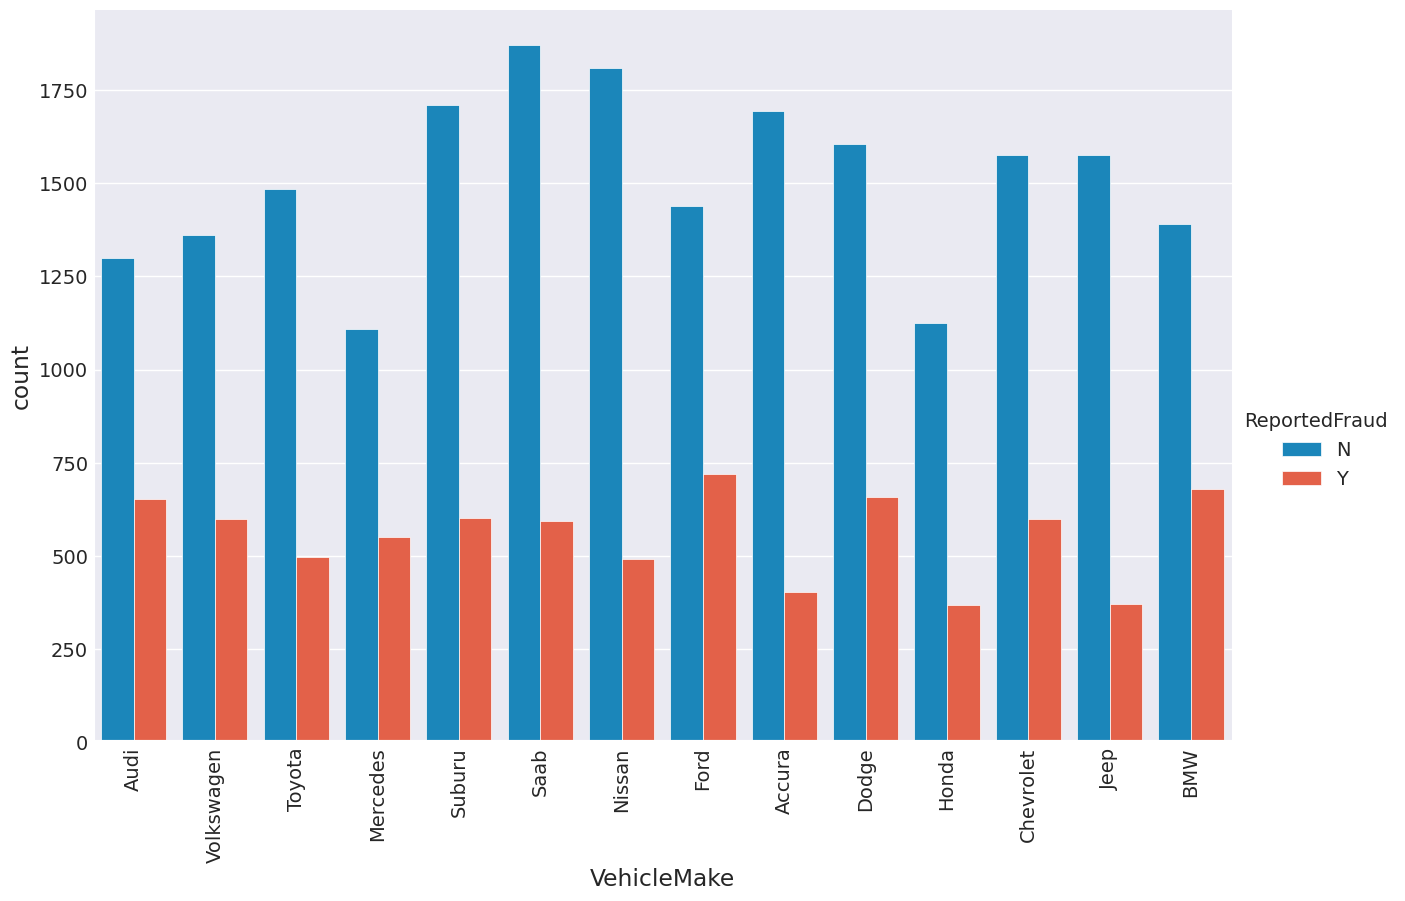

In [193]:
sns.catplot(data=master,x='VehicleMake',hue='ReportedFraud',kind='count',height=8.27, aspect=12.7/8.27)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'movies'),
  Text(1, 0, 'cross-fit'),
  Text(2, 0, 'polo'),
  Text(3, 0, 'dancing'),
  Text(4, 0, 'sleeping'),
  Text(5, 0, 'camping'),
  Text(6, 0, 'golf'),
  Text(7, 0, 'paintball'),
  Text(8, 0, 'base-jumping'),
  Text(9, 0, 'yachting'),
  Text(10, 0, 'basketball'),
  Text(11, 0, 'hiking'),
  Text(12, 0, 'bungie-jumping'),
  Text(13, 0, 'exercise'),
  Text(14, 0, 'board-games'),
  Text(15, 0, 'reading'),
  Text(16, 0, 'skydiving'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'kayaking'),
  Text(19, 0, 'chess')])

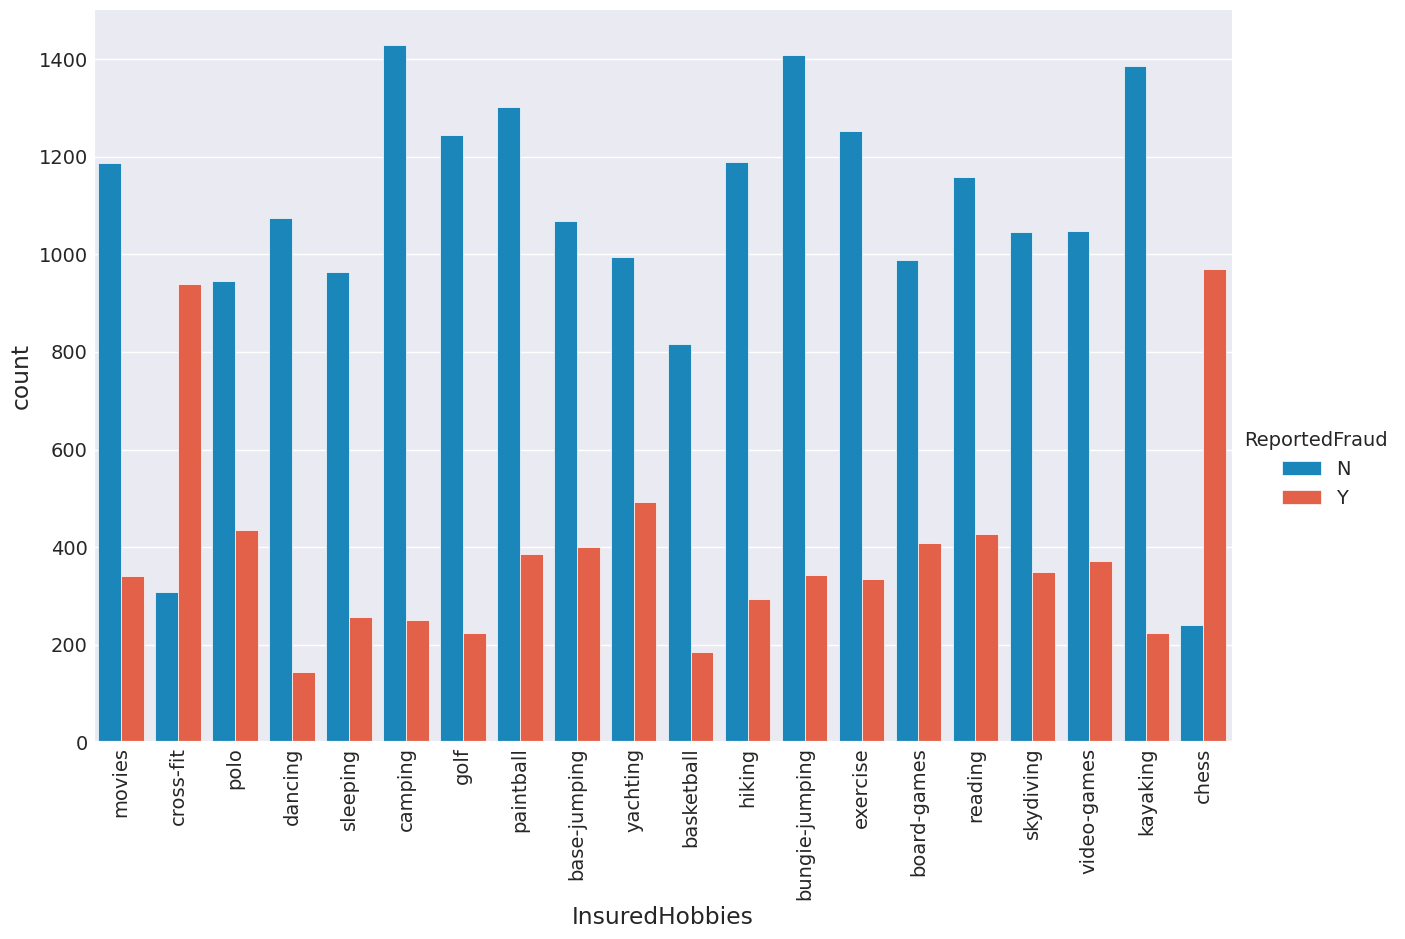

In [194]:
#insuredd hobiees vs reported as fraud
sns.catplot(data=master,x='InsuredHobbies',hue='ReportedFraud',kind='count',height=8.27, aspect=12.7/8.27)
plt.xticks(rotation = 90)

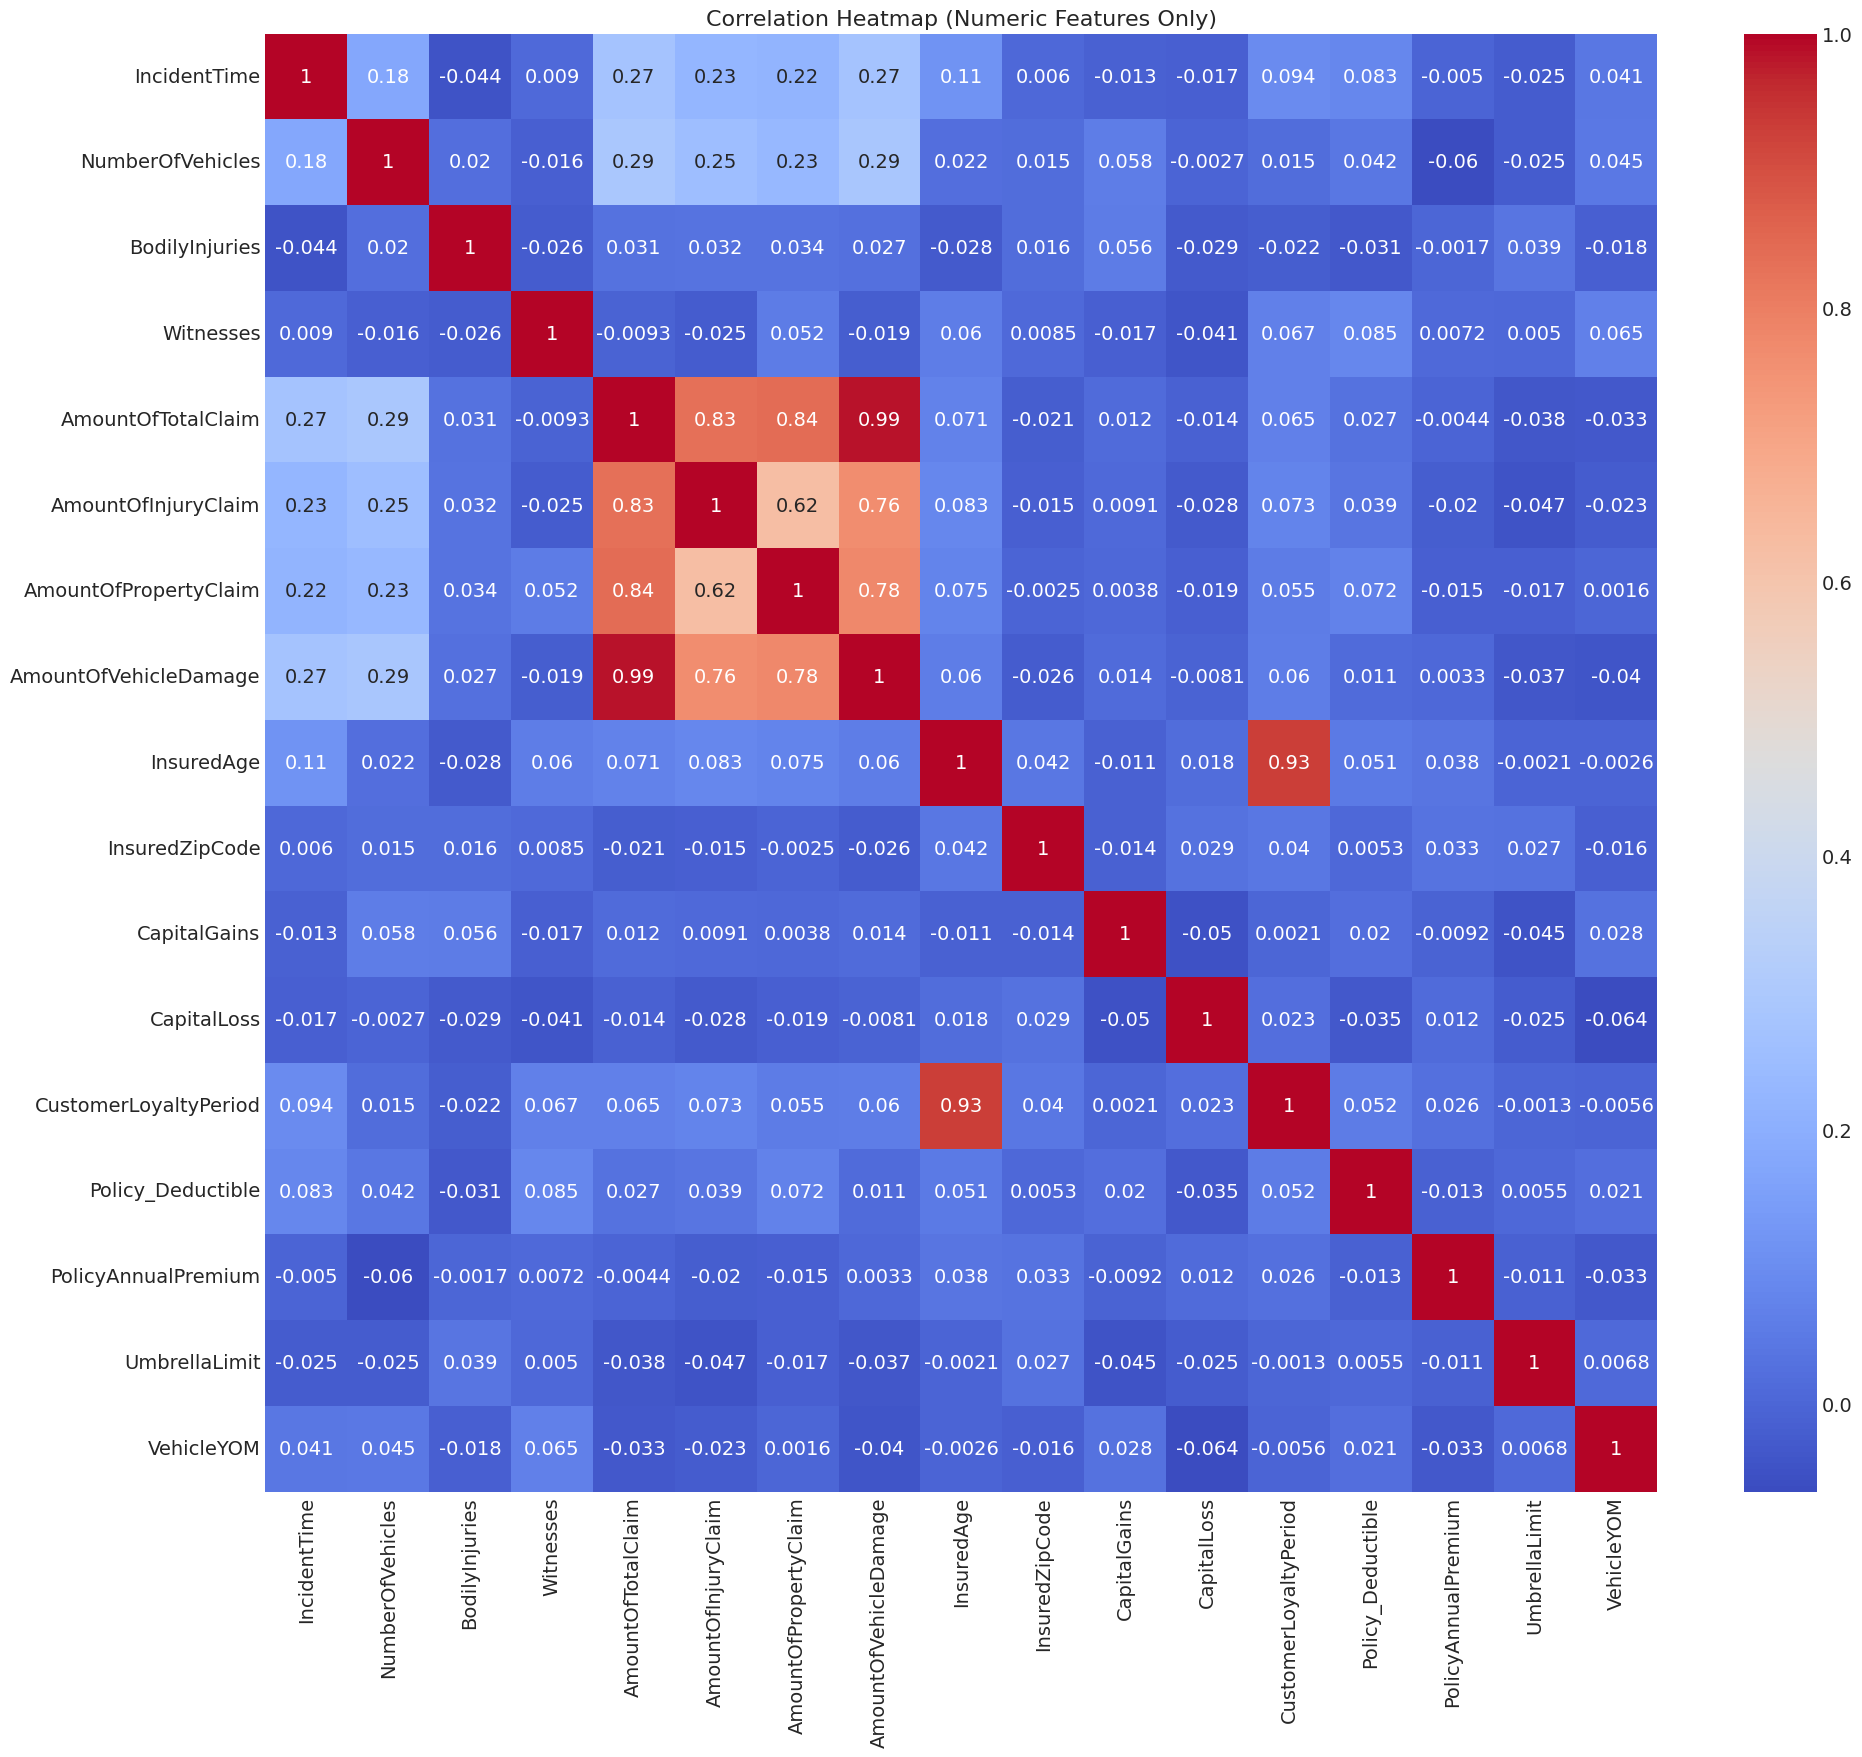

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# select only numeric columns
corr = master.select_dtypes(include=['number']).corr()

# plot heatmap
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=16)
plt.show()
master['DateOfIncident'] = pd.to_datetime(master['DateOfIncident'], errors='coerce')
master['DateOfIncident_num'] = master['DateOfIncident'].map(pd.Timestamp.toordinal)





# catogorical to numerical

In [196]:
master['PropertyDamage']= master['PropertyDamage'].map({'YES':1,'NO':0,'missing':2})

In [197]:
master['PoliceReport']= master['PoliceReport'].map({'YES':1,'NO':0,'missing':2})

In [198]:
master.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeOfIncident,28836,4,Multi-vehicle Collision,11966
TypeOfCollission,28836,3,Rear Collision,13723
SeverityOfIncident,28836,4,Minor Damage,10400
AuthoritiesContacted,26144,4,Police,8324
IncidentState,28836,7,State5,7886
IncidentCity,28836,7,City2,4486
IncidentAddress,28836,1000,Location 1341,73
InsuredGender,28836,2,FEMALE,15674
InsuredEducationLevel,28836,7,JD,4808
InsuredOccupation,28836,14,machine-op-inspct,2798


In [199]:
master=master.drop(columns=['DateOfIncident','IncidentAddress','DateOfPolicyCoverage','InsuredZipCode'])

In [200]:
#catogorical columns
categorical_columns = master.select_dtypes(include=['object']).columns
categorical_columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'ReportedFraud'],
      dtype='object')

In [201]:
master.shape

(28836, 35)

In [202]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

for colum in categorical_columns:
    master[colum]= label.fit_transform(master[colum])

In [203]:
master.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud,DateOfIncident_num
0,0,2,2,3,4,0,17.0,3.0,2,1.0,0,2,65501,13417.0,6071.0,46013.0,35.0,1,3,1,12,56700.0,-48500.0,49.0,0,1,1000.0,1632.73,0.0,1,1,5,2008.0,0,735632
1,0,2,2,3,4,4,10.0,3.0,1,2.0,1,1,61382,15560.0,5919.0,39903.0,36.0,1,3,12,6,70600.0,-48500.0,114.0,0,1,1000.0,1255.19,0.0,1,1,5,2006.0,0,735631
2,2,2,1,2,5,5,22.0,1.0,1,2.0,3,0,66755,11630.0,11630.0,43495.0,33.0,1,3,1,14,66400.0,-63700.0,167.0,2,6,617.0,1373.38,0.0,5,13,20,1999.0,0,735613
3,2,2,1,2,6,5,22.0,1.0,1,2.0,3,0,66243,12003.0,12003.0,42237.0,36.0,1,3,1,14,47900.0,-73400.0,190.0,1,6,722.0,1337.60,0.0,3,13,20,2003.0,0,735617
4,2,1,1,1,5,5,10.0,1.0,0,2.0,1,1,53544,8829.0,7234.0,37481.0,29.0,0,2,3,7,0.0,-41500.0,115.0,1,1,500.0,1353.73,4279863.0,4,12,8,2010.0,0,735607


In [204]:
master.dtypes

,0
TypeOfIncident,int64
TypeOfCollission,int64
SeverityOfIncident,int64
AuthoritiesContacted,int64
IncidentState,int64
IncidentCity,int64
IncidentTime,float64
NumberOfVehicles,float64
PropertyDamage,int64
BodilyInjuries,float64


In [205]:
master.isnull().sum()

,0
TypeOfIncident,0
TypeOfCollission,0
SeverityOfIncident,0
AuthoritiesContacted,0
IncidentState,0
IncidentCity,0
IncidentTime,0
NumberOfVehicles,0
PropertyDamage,0
BodilyInjuries,0


In [206]:
x=master.drop('ReportedFraud',axis=1)
y=master['ReportedFraud']
x.shape

(28836, 34)

# test data

In [208]:
#read csv files for test data
df1 = pd.read_csv('/content/drive/MyDrive/Train_Claim.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Train_Demographics.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Train_Policy.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Train_Vehicle_new.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Traindata_with_Target.csv')

In [209]:
#checking shape for test data
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(28836, 19)
(28836, 10)
(28836, 10)
(28836, 5)
(28836, 2)


In [210]:
#merging all datasets based on "CstomerID"
sample_1=pd.merge(df1,df2)
sample_2=pd.merge(sample_1,df3)
sample_3=pd.merge(sample_2,df4)
test=pd.merge(sample_3,df5)

In [211]:
test.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


# **Test data Preprocessing**

In [212]:
# Making a list of missing value types
missing_values = ["MISSEDDATA","NA","?","MISSINGVALUE","???",-5,"MISSINGVAL",-1,"N/A","na"]

In [214]:
# we create one missing values list by using that if that comes in any place we replace it with nan
for column in test.columns:
    for missing in missing_values:
        test[column] = np.where(test[column] == missing, np.nan, test[column])


In [215]:
test.isnull().sum()

,0
CustomerID,0
DateOfIncident,0
TypeOfIncident,0
TypeOfCollission,5162
SeverityOfIncident,0
AuthoritiesContacted,2692
IncidentState,0
IncidentCity,0
IncidentAddress,0
IncidentTime,31


In [216]:
test['PropertyDamage'].fillna('missing',inplace=True)
test['PoliceReport'].fillna('missing',inplace=True)

/tmp/ipython-input-1573836622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['PropertyDamage'].fillna('missing',inplace=True)
/tmp/ipython-input-1573836622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [217]:
test['PropertyDamage']


,PropertyDamage
0,missing
1,YES
2,YES
3,YES
4,NO
...,...
28831,NO
28832,YES
28833,YES
28834,missing


In [218]:
test['PoliceReport']

,PoliceReport
0,missing
1,YES
2,NO
3,NO
4,YES
...,...
28831,missing
28832,YES
28833,YES
28834,YES


In [219]:
test['PropertyDamage']= test['PropertyDamage'].map({'YES':1,'NO':0,'missing':2})

In [220]:
test['PoliceReport']= test['PoliceReport'].map({'YES':1,'NO':0,'missing':2})

In [225]:
##  Replace NAN values with most occured category in TypeOfCollission
def fill_mode(df, col):
    if col in df.columns:
        mode_vals = df[col].mode(dropna=True)
        if len(mode_vals) > 0:
            df[col] = df[col].fillna(mode_vals[0])
        else:
            # nothing to fill (all NaN)
            df[col] = df[col].fillna(np.nan)

# Helper: safe convert-to-numeric, compute median, fill
def fill_numeric_median(df, col):
    if col in df.columns:
        # remove commas/spaces, coerce invalids to NaN
        s = df[col].astype(str).str.replace(',', '').str.strip()
        s = s.replace({'': np.nan, 'None': np.nan, 'NA': np.nan, 'nan': np.nan})
        num = pd.to_numeric(s, errors='coerce')
        median_val = num.median()
        df[col] = num.fillna(median_val)

# Helper: safe convert-to-datetime and fill median datetime
def fill_datetime_median(df, col):
    if col in df.columns:
        dt = pd.to_datetime(df[col], errors='coerce')
        if dt.notna().any():
            median_dt = dt.median()
            df[col] = dt.fillna(median_dt)
        else:
            # fallback: try numeric median
            fill_numeric_median(df, col)

# ---------- Now apply fixes ----------

# 1) TypeOfCollission (categorical: fill with mode)
fill_mode(test, "TypeOfCollission")

# 2) IncidentTime — try datetime median first, otherwise numeric median
fill_datetime_median(test, "IncidentTime")

# 3) master['Witnesses'] — ensure numeric then fill with median (and keep as nullable Int if you want)
if 'Witnesses' in master.columns:
    master['Witnesses'] = pd.to_numeric(master['Witnesses'].astype(str).str.replace(',', '').str.strip(),
                                         errors='coerce')
    median_1 = master['Witnesses'].median()
    # If you want integer without NA: fill then astype(int)
    # master['Witnesses'] = master['Witnesses'].fillna(int(median_1)).astype(int)
    # Safer: keep pandas nullable integer dtype so missingness can remain
    master['Witnesses'] = master['Witnesses'].fillna(median_1).astype('Int64')

# 4) Drop huge missing-value column safely (won't error if missing)
test.drop(columns=['Country'], errors='ignore', inplace=True)

# 5) AmountOfTotalClaim (numeric median)
fill_numeric_median(test, 'AmountOfTotalClaim')

# 6) InsuredGender (categorical mode)
fill_mode(test, 'InsuredGender')

# 7) PolicyAnnualPremium (numeric median)
fill_numeric_median(test, 'PolicyAnnualPremium')

# 8) VehicleMake (categorical mode)
fill_mode(test, 'VehicleMake')

# Optional: show a summary of what changed
print("Columns present in test:", test.columns.tolist())
for c in ['TypeOfCollission','IncidentTime','AmountOfTotalClaim','PolicyAnnualPremium','InsuredGender','VehicleMake']:
    if c in test.columns:
        print(c, " -> dtype:", test[c].dtype, "  nulls:", int(test[c].isna().sum()))

if 'Witnesses' in master.columns:
    print("master['Witnesses'] dtype:", master['Witnesses'].dtype, " nulls:", int(master['Witnesses'].isna().sum()))


Columns present in test: ['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud']
TypeOfCollission  -> dtype: object   nulls: 0
IncidentTime  -> dtype: datetime64[ns]   nulls: 0
AmountOfTotalClaim  -> dtype: int64   nulls: 0
PolicyAnnualPremium  -> dtype: float

In [224]:
test['AmountOfTotalClaim'] = test['AmountOfTotalClaim'].astype('int')

In [226]:
#remove some features which is not important
test=test.drop(columns=['InsurancePolicyNumber','DateOfIncident','IncidentAddress','DateOfPolicyCoverage','InsuredZipCode','VehicleID'])

In [227]:
customerid=test['CustomerID']
test.drop(['CustomerID'],axis=1,inplace=True)

In [228]:
#catogorical columns
categorical_columns = test.select_dtypes(include=['object']).columns
categorical_columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'Witnesses',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'ReportedFraud'],
      dtype='object')

In [229]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for columns in categorical_columns:
    test[columns]= label.fit_transform(test[columns])

In [230]:
test.dtypes

,0
TypeOfIncident,int64
TypeOfCollission,int64
SeverityOfIncident,int64
AuthoritiesContacted,int64
IncidentState,int64
IncidentCity,int64
IncidentTime,datetime64[ns]
NumberOfVehicles,float64
PropertyDamage,int64
BodilyInjuries,float64


In [231]:
test.isnull().sum().any()

np.False_

In [232]:
test.shape

(28836, 34)

# **Scaling The Data**

In [233]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
train_scaled=pd.DataFrame(mm.fit_transform(x))

In [235]:
print("Original dtypes:\n", test.dtypes.value_counts())
print("\nSample dtypes:\n", test.dtypes.head(30))

# ---- Step 1: convert any datetime columns to numeric timestamps ----------
# (this creates new columns with suffix '_ts' so we keep originals)
dt_cols = test.select_dtypes(include=['datetime64[ns]', 'datetimetz']).columns.tolist()
# If your date columns are strings, you might convert them first:
# test['YourDateCol'] = pd.to_datetime(test['YourDateCol'], errors='coerce')

for col in dt_cols:
    # convert to POSIX timestamp (seconds since epoch) as float
    test[col + '_ts'] = pd.to_datetime(test[col], errors='coerce').map(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

# ---- Step 2: optionally convert boolean/categorical to numeric if you want them included ----
# Example: booleans automatically convert; for categories you might want label encoding or one-hot encoding.
# For now we'll keep only numeric columns (including the new *_ts).

# ---- Step 3: select numeric columns (includes Int64, Float64, etc.) ----
numeric_df = test.select_dtypes(include=[np.number]).copy()

# ---- Step 4: ensure pandas nullable integer dtypes convert to numpy floats ----
# Convert all numeric columns to float64 so sklearn receives a plain float ndarray
numeric_df = numeric_df.astype('float64')

# ---- Step 5: handle NaNs (MinMaxScaler can't handle NaNs). Simple approach: fill with median ----
numeric_df = numeric_df.fillna(numeric_df.median())

# (Optional) If you prefer another imputation strategy, replace the line above.

# ---- Step 6: scale using MinMaxScaler ----
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(numeric_df)        # shape: (n_rows, n_numeric_features)

# Put back into a DataFrame with meaningful column names
test_scaled = pd.DataFrame(scaled_array, columns=numeric_df.columns, index=test.index)

# Quick checks
print("Scaled dataframe shape:", test_scaled.shape)
print(test_scaled.head())

# If you need to keep non-numeric columns as well, you can concat them:
non_numeric = test.drop(columns=numeric_df.columns)
result = pd.concat([non_numeric.reset_index(drop=True), test_scaled.reset_index(drop=True)], axis=1)

# result now contains scaled numeric cols plus the original non-numeric cols


Original dtypes:
 int64             20
float64           13
datetime64[ns]     1
Name: count, dtype: int64

Sample dtypes:
 TypeOfIncident                         int64
TypeOfCollission                       int64
SeverityOfIncident                     int64
AuthoritiesContacted                   int64
IncidentState                          int64
IncidentCity                           int64
IncidentTime                  datetime64[ns]
NumberOfVehicles                     float64
PropertyDamage                         int64
BodilyInjuries                       float64
Witnesses                              int64
PoliceReport                           int64
AmountOfTotalClaim                     int64
AmountOfInjuryClaim                  float64
AmountOfPropertyClaim                float64
AmountOfVehicleDamage                float64
InsuredAge                           float64
InsuredGender                          int64
InsuredEducationLevel                  int64
InsuredOccupation    

## **Model Creation**

In [236]:
x.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM,DateOfIncident_num
0,0,2,2,3,4,0,17.0,3.0,2,1.0,0,2,65501,13417.0,6071.0,46013.0,35.0,1,3,1,12,56700.0,-48500.0,49.0,0,1,1000.0,1632.73,0.0,1,1,5,2008.0,735632
1,0,2,2,3,4,4,10.0,3.0,1,2.0,1,1,61382,15560.0,5919.0,39903.0,36.0,1,3,12,6,70600.0,-48500.0,114.0,0,1,1000.0,1255.19,0.0,1,1,5,2006.0,735631
2,2,2,1,2,5,5,22.0,1.0,1,2.0,3,0,66755,11630.0,11630.0,43495.0,33.0,1,3,1,14,66400.0,-63700.0,167.0,2,6,617.0,1373.38,0.0,5,13,20,1999.0,735613
3,2,2,1,2,6,5,22.0,1.0,1,2.0,3,0,66243,12003.0,12003.0,42237.0,36.0,1,3,1,14,47900.0,-73400.0,190.0,1,6,722.0,1337.60,0.0,3,13,20,2003.0,735617
4,2,1,1,1,5,5,10.0,1.0,0,2.0,1,1,53544,8829.0,7234.0,37481.0,29.0,0,2,3,7,0.0,-41500.0,115.0,1,1,500.0,1353.73,4279863.0,4,12,8,2010.0,735607


In [237]:
print(x.shape)
print(test.shape)

(28836, 34)
(28836, 35)


In [238]:
train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.000000,1.0,0.666667,0.75,0.666667,0.000000,0.739130,0.666667,1.0,0.5,0.000000,1.0,0.569408,0.625501,0.256485,0.577765,0.355556,1.0,0.500000,0.076923,0.631579,0.564179,0.563456,0.100418,0.0,0.125,0.333333,0.742532,0.090909,0.2,0.076923,0.131579,0.65,0.458333
1,0.000000,1.0,0.666667,0.75,0.666667,0.666667,0.434783,0.666667,0.5,1.0,0.333333,0.5,0.533519,0.725408,0.250063,0.500862,0.377778,1.0,0.500000,0.923077,0.315789,0.702488,0.563456,0.236402,0.0,0.125,0.333333,0.508226,0.090909,0.2,0.076923,0.131579,0.55,0.444444
2,0.666667,1.0,0.333333,0.50,0.833333,0.833333,0.956522,0.000000,0.5,1.0,1.000000,0.0,0.580335,0.542191,0.491339,0.546072,0.311111,1.0,0.500000,0.076923,0.736842,0.660697,0.426643,0.347280,1.0,0.750,0.078000,0.581576,0.090909,1.0,1.000000,0.526316,0.20,0.194444
3,0.666667,1.0,0.333333,0.50,1.000000,0.833333,0.956522,0.000000,0.5,1.0,1.000000,0.0,0.575873,0.559580,0.507098,0.530239,0.377778,1.0,0.500000,0.076923,0.736842,0.476617,0.339334,0.395397,0.5,0.750,0.148000,0.559371,0.090909,0.6,1.000000,0.526316,0.40,0.250000
4,0.666667,0.5,0.333333,0.25,0.833333,0.833333,0.434783,0.000000,0.0,1.0,0.333333,0.5,0.465226,0.411608,0.305619,0.470378,0.222222,0.0,0.333333,0.230769,0.368421,0.000000,0.626463,0.238494,0.5,0.125,0.000000,0.569381,0.479988,0.8,0.923077,0.210526,0.75,0.111111


In [239]:
test_scaled.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud,IncidentTime_ts
0,0.000000,1.0,0.666667,0.75,0.666667,0.000000,0.666667,1.0,0.5,0.00,1.0,0.569408,0.625501,0.256485,0.577765,0.355556,1.0,0.500000,0.076923,0.631579,0.564179,0.563456,0.100418,0.0,0.125,0.333333,0.742532,0.090909,0.2,0.076923,0.131579,0.65,0.0,0.0
1,0.000000,1.0,0.666667,0.75,0.666667,0.666667,0.666667,0.5,1.0,0.25,0.5,0.533519,0.725408,0.250063,0.500862,0.377778,1.0,0.500000,0.923077,0.315789,0.702488,0.563456,0.236402,0.0,0.125,0.333333,0.508226,0.090909,0.2,0.076923,0.131579,0.55,0.0,0.0
2,0.666667,1.0,0.333333,0.50,0.833333,0.833333,0.000000,0.5,1.0,0.75,0.0,0.580335,0.542191,0.491339,0.546072,0.311111,1.0,0.500000,0.076923,0.736842,0.660697,0.426643,0.347280,1.0,0.750,0.078000,0.581576,0.090909,1.0,1.000000,0.526316,0.20,0.0,0.0
3,0.666667,1.0,0.333333,0.50,1.000000,0.833333,0.000000,0.5,1.0,0.75,0.0,0.575873,0.559580,0.507098,0.530239,0.377778,1.0,0.500000,0.076923,0.736842,0.476617,0.339334,0.395397,0.5,0.750,0.148000,0.559371,0.090909,0.6,1.000000,0.526316,0.40,0.0,0.0
4,0.666667,0.5,0.333333,0.25,0.833333,0.833333,0.000000,0.0,1.0,0.25,0.5,0.465226,0.411608,0.305619,0.470378,0.222222,0.0,0.333333,0.230769,0.368421,0.000000,0.626463,0.238494,0.5,0.125,0.000000,0.569381,0.479988,0.8,0.923077,0.210526,0.75,0.0,0.0


In [240]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
dt=DecisionTreeClassifier()

In [242]:
#fitting the model
dt.fit(train_scaled,y)

DecisionTreeClassifier()

In [243]:
from sklearn import tree

In [244]:
!pip install graphviz

In [245]:
decision_tree=tree.export_graphviz(dt,out_file='tree.dot',feature_names=x.columns,max_depth=2,filled=True)

In [246]:
!dot -Tpng tree.dot -o tree.png

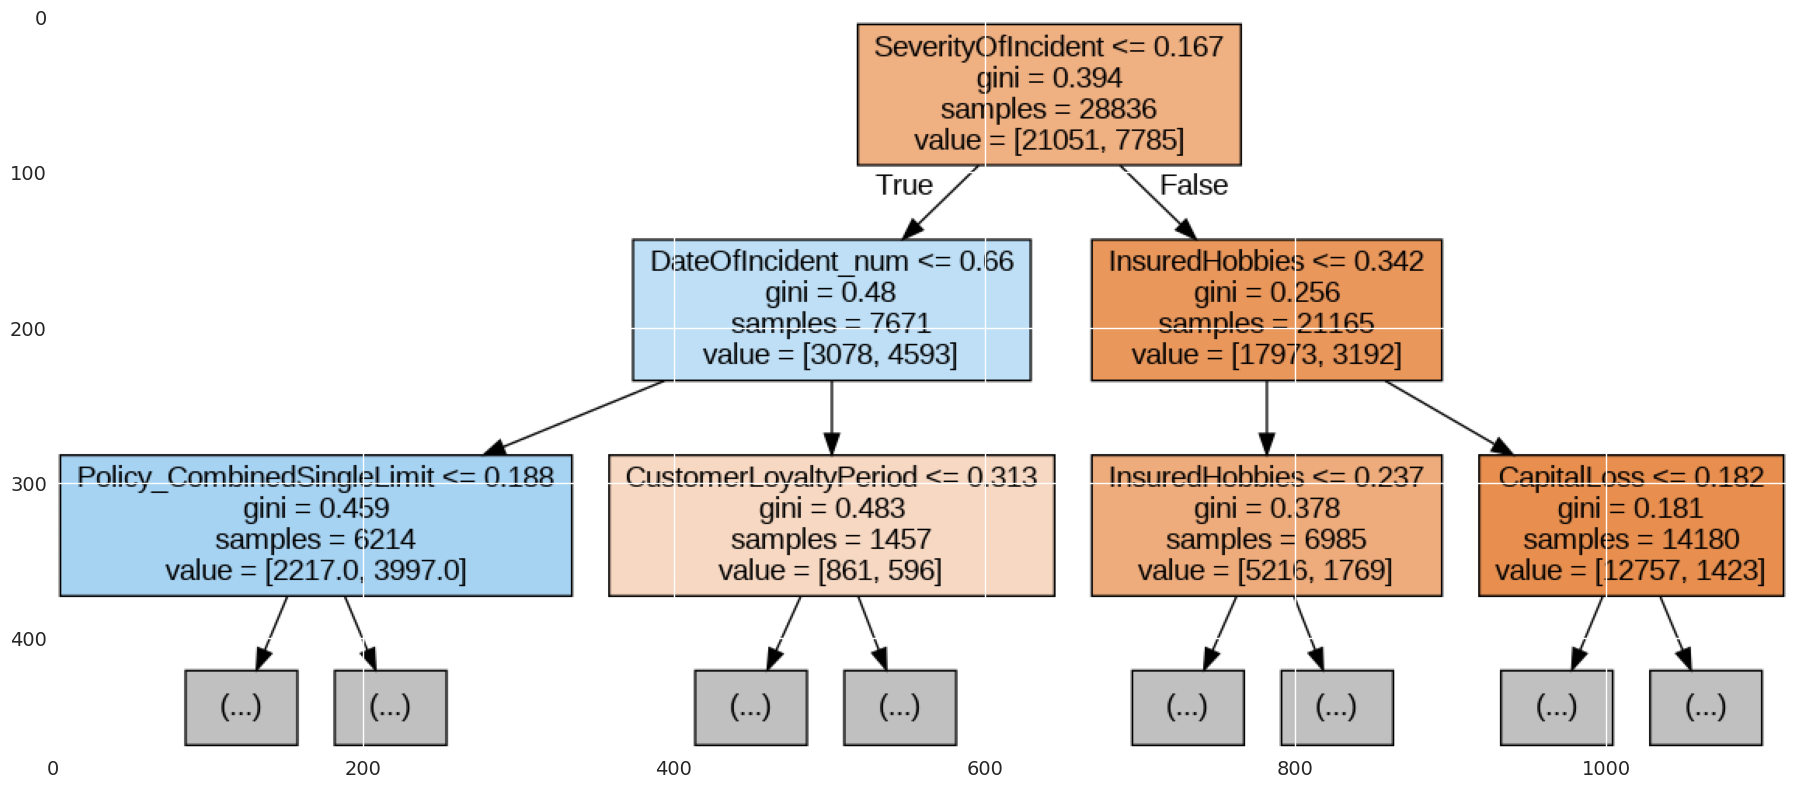

In [247]:
image=plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)

In [248]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(train_scaled,y)

RandomForestClassifier()

In [249]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier()
ada.fit(train_scaled,y)

AdaBoostClassifier()

In [250]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_scaled,y)

GradientBoostingClassifier()

In [251]:
y_pred=rf.predict(test_scaled)
y1_pred=ada.predict(test_scaled)
y2_pred=gb.predict(test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [262]:
#model 1 randomforest classifier
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [253]:
#model 2 AdaboostBoosclassifier
y1_pred

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
#model 3 GradientBoosting classifier
y2_pred

array([0, 0, 0, ..., 0, 0, 0])

# **Hyperparameter tuning**

In [255]:
from sklearn.model_selection import GridSearchCV

In [261]:
from sklearn.model_selection import KFold
KFold=KFold(n_splits=5)

In [260]:
param_grid = {'n_estimators' : [100,110],
              'max_features' : [3,4],
             'max_depth' : [3,5,7],
              'min_samples_split' : [2,8,4]}

In [258]:
GSV = GridSearchCV(rf,param_grid,verbose=3,cv=KFold,n_jobs=4)
GSV.fit(train_scaled, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [3, 4],
                         'min_samples_split': [2, 8, 4],
                         'n_estimators': [100, 110]},
             verbose=3)

In [263]:
GSV.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 8,
 'n_estimators': 110}

In [264]:
random=RandomForestClassifier(n_estimators=110,max_depth=7,min_samples_split=4,max_features=4)
random.fit(train_scaled,y)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_split=4,
                       n_estimators=110)

In [265]:
y_new=random.predict(test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [266]:
#hyperparameter tuned output of randomforest
y_new

array([0, 0, 0, ..., 0, 0, 0])

In [267]:
result=pd.DataFrame({'CustomerID':customerid,'ReportedFraud':y_new})


In [268]:
result['ReportedFraud'].value_counts()

,count
ReportedFraud,
0,28035
1,801


In [269]:
result.to_csv('barath_final.csv',index=False)

# **Conclusion**
This project has built a model that can detect auto insurance fraud claim. In doing so, the model can reduces loses for insurance companies.

Three different Ensembele classifiers were used in this project: Randomrforest,AdaBosst,Gradient boosst .out of these three Random forest give F1.Score 82 .

based on this model the main fraud claims are done by peoples  based on when **SeverityOfIncident** if they mentioned majour damage that peoples involed in fraud claims rather than others this is main insight i got from this model and apart from this some other possibilites  like their **hobbies** and  **relationship** ,**Bodilyinjuries**.thes are some main insights from this model